<a href="https://colab.research.google.com/github/CodewithTanzeel/BlackByte-ML/blob/main/fraud_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from google.colab import files

df = pd.read_csv("/content/creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,269312.000000,269312.000000,269311.000000,269311.000000,269311.000000,269311.000000,269311.000000,269311.000000,269311.000000,269311.000000,...,269311.000000,269311.000000,269311.000000,269311.000000,269311.000000,269311.000000,269311.000000,269311.000000,269311.000000,269311.000000
mean,90621.388824,-0.010451,-0.013635,0.042531,0.009667,-0.016733,0.007629,-0.007275,-0.000185,-0.000030,...,-0.000135,-0.003965,-0.002125,0.000994,0.008505,0.000901,-0.000274,0.000576,89.508776,0.001786
std,45402.770250,1.958071,1.657016,1.510119,1.416553,1.368071,1.325305,1.220179,1.191455,1.103989,...,0.736826,0.722291,0.630426,0.605956,0.518333,0.483388,0.399232,0.332613,248.032323,0.042224
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,52474.750000,-0.923973,-0.606981,-0.821875,-0.846105,-0.708698,-0.760788,-0.559317,-0.206423,-0.648997,...,-0.226757,-0.538128,-0.163023,-0.352310,-0.306628,-0.327997,-0.070712,-0.051982,5.990000,0.000000
50%,80906.000000,0.017067,0.059820,0.232991,-0.005032,-0.073544,-0.263559,0.030723,0.024317,-0.053643,...,-0.029772,0.004604,-0.013916,0.043295,0.031411,-0.054836,0.001610,0.012315,22.690000,0.000000
75%,134122.000000,1.294988,0.789316,1.059550,0.766358,0.591405,0.408930,0.559948,0.327413,0.601660,...,0.182679,0.516900,0.142849,0.437016,0.356320,0.243804,0.089674,0.077883,78.990000,0.000000
max,163624.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [9]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
269307,163622.0,0.508904,0.649664,0.973601,1.054893,-0.406338,-0.343784,0.018162,-0.061663,0.301350,...,0.071984,0.468318,0.265016,0.028976,-1.791758,-0.690011,0.418209,0.315569,1.00,0.0
269308,163623.0,1.969238,-0.386206,-0.422364,0.151434,-0.550257,-0.269741,-0.632417,0.143496,1.233122,...,-0.093816,-0.204126,0.319091,-0.481361,-0.401275,-0.914828,0.052024,-0.043066,1.00,0.0
269309,163623.0,2.143922,-0.681218,-1.328920,-0.786185,-0.457053,-1.277814,-0.080907,-0.473492,-0.662790,...,0.067409,0.222521,0.153918,0.031472,-0.000407,-0.283674,-0.035735,-0.055022,47.55,0.0
269310,163623.0,1.997843,-0.260107,-0.283649,0.346443,-0.733479,-0.853783,-0.453823,-0.096166,1.351108,...,-0.120094,-0.213117,0.356999,-0.017812,-0.374293,-0.926075,0.058296,-0.027203,1.00,0.0
269311,163624.0,2.369304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# dataet information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269312 entries, 0 to 269311
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    269312 non-null  float64
 1   V1      269312 non-null  float64
 2   V2      269311 non-null  float64
 3   V3      269311 non-null  float64
 4   V4      269311 non-null  float64
 5   V5      269311 non-null  float64
 6   V6      269311 non-null  float64
 7   V7      269311 non-null  float64
 8   V8      269311 non-null  float64
 9   V9      269311 non-null  float64
 10  V10     269311 non-null  float64
 11  V11     269311 non-null  float64
 12  V12     269311 non-null  float64
 13  V13     269311 non-null  float64
 14  V14     269311 non-null  float64
 15  V15     269311 non-null  float64
 16  V16     269311 non-null  float64
 17  V17     269311 non-null  float64
 18  V18     269311 non-null  float64
 19  V19     269311 non-null  float64
 20  V20     269311 non-null  float64
 21  V21     26

In [11]:
# checking the Number of missing Values in Each Coloumn
df.isnull().sum()

,0
Time,0
V1,0
V2,1
V3,1
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


In [12]:
# Distribution of legit transections & fraudalent Transection
df['Class'].value_counts()

,count
Class,
0.0,268830
1.0,481


Data set is highly unbalanced

In [13]:
# Seperating The data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [14]:
print(legit.shape)
print(fraud.shape)

(268830, 31)
(481, 31)


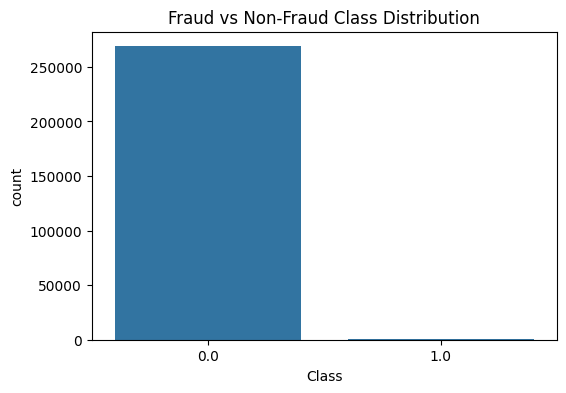

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df)
plt.title("Fraud vs Non-Fraud Class Distribution")
plt.show()

In [16]:
# Statistics of amount coloumn
legit.Amount.describe()

,Amount
count,268830.000000
mean,89.452002
std,248.011506
min,0.000000
25%,5.990000
50%,22.700000
75%,78.897500
max,19656.530000


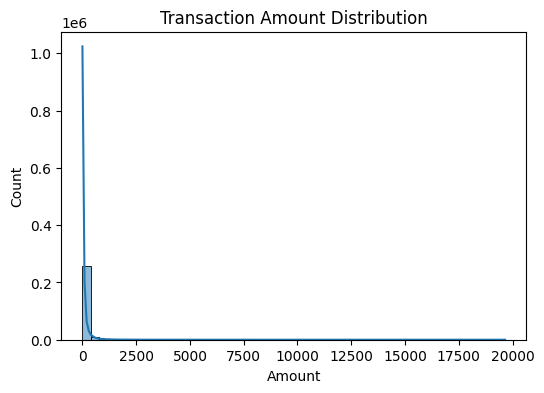

In [17]:
# Distribution of transaction amount (example feature)
plt.figure(figsize=(6,4))
sns.histplot(df["Amount"], bins=50, kde=True) # adjust column name if needed
plt.title("Transaction Amount Distribution")
plt.show()

In [18]:
fraud.Amount.describe()

,Amount
count,481.000000
mean,121.239605
std,257.722080
min,0.000000
25%,1.000000
50%,8.640000
75%,104.810000
max,2125.870000


In [22]:
# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_resampled.value_counts())

Before SMOTE: Class
0.0    268830
1.0       481
Name: count, dtype: int64
After SMOTE: Class
0.0    268830
1.0    268830
Name: count, dtype: int64


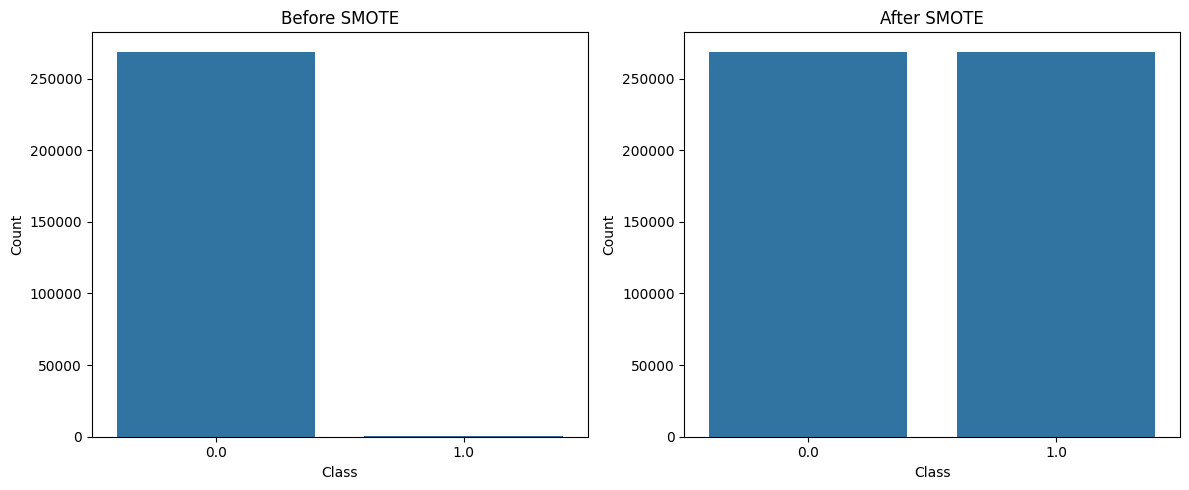

In [27]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Before SMOTE
sns.countplot(x=y, ax=axes[0])
axes[0].set_title("Before SMOTE")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

# After SMOTE
sns.countplot(x=y_resampled, ax=axes[1])
axes[1].set_title("After SMOTE")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [24]:
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)
balanced_df.to_csv("fraud_data_preparation.csv", index=False)


print("Balanced dataset saved as fraud_data_preparation.csv")
balanced_df.head()


files.download("fraud_data_preparation.csv")

Balanced dataset saved as fraud_data_preparation.csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
